In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip3 uninstall tensorflow
!pip3 install tensorflow==2.8.0 # current version 2.14.0, reinstall it after this
!pip3 install tensorflow--gpu

Found existing installation: tensorflow 2.14.0
Uninstalling tensorflow-2.14.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.14.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.14.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install requests numpy pillow scipy scikit-image==0.18.3 imgaug matplotlib labelme2coco==0.1.0 pixellib==0.5.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.2/29.2 MB 33.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-image: filename=scikit_image-0.18.3-cp310-cp310-linux_x86_64.whl size=36041297 sha256=5fe04f4c1fe876627cdd573227b12a56e0a51b4677728ad74168d24760665cd3
  Stored in directory: /root/.cache/pip/wheels/9d/55/80/c5bf730bc10906b1518cd6ebc05c87e69d1c46099ebdc9f59f
  Created wheel for imantics: filename=imantics-0.1.12-py3-none-any.whl size=16011 sha256=2455762c559c3cd97564b8a697091e5545c67921614f1470c400ca1187a80ecd
  Stored in directory: /root/.cache/pip/wheels/56/6a/be/4c60e88b14abec4e93234a1f7f91ce8abe1ae88a2b3eaad3ac
Successfully built scikit-image imantics
  Attempting uninstall: scikit-image
    Found existing installation: sciki

In [4]:
import pixellib
from pixellib.custom_train import instance_custom_training

import json
import numpy as np
import pandas as pd
import os
# Used to randomly shuffle the data
import random
# Used to copy/move from data source to data destination
import shutil
# Used to get the image data
import base64

import tensorflow as tf
print(tf.__version__)

2.8.0


### Visualize the dataset

In [5]:
# Path to the exports folder
exports_dir = '/content/drive/MyDrive/test/exports'

In [6]:
#Path to models folder
models_dir = '/content/drive/MyDrive/computer_vision_model'

In [ ]:
vis_img = instance_custom_training()

In [ ]:
vis_img.load_dataset(exports_dir)

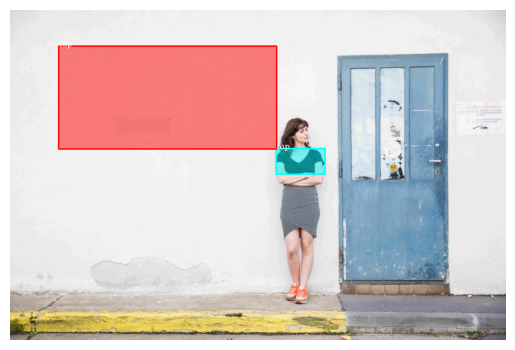

In [ ]:
vis_img.visualize_sample()

###Train a custom model using cusomized Fashionpedia dataset

In [7]:
train_maskrcnn = instance_custom_training()

In [8]:
train_maskrcnn.modelConfig(network_backbone = 'resnet101', num_classes= 12, batch_size = 1)

Using resnet101 as network backbone For Mask R-CNN model


In [9]:
train_maskrcnn.load_pretrained_model(models_dir+'/mask_rcnn_model.007-1.809600.h5')

In [10]:
train_maskrcnn.load_dataset(exports_dir)

In [11]:
train_maskrcnn.train_model(num_epochs = 75, augmentation=True,  path_trained_models = models_dir)

Train 808 images
Validate 350 images
Applying augmentation on dataset
Checkpoint Path: /content/drive/MyDrive/computer_vision_model
Selecting layers to train


/usr/local/lib/python3.10/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.10/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.10/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data typ

Epoch 1/75


/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("training/SGD/gradients/gradients/roi_align_classifier/concat_grad/sub:0", shape=(None,), dtype=int32), values=Tensor("training/SGD/gradients/gradients/roi_align_classifier/concat_grad/GatherV2_2:0", shape=(None, 7, 7, 256), dtype=float32), dense_shape=Tensor("training/SGD/gradients/gradients/roi_align_classifier/concat_grad/Shape:0", shape=(4,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("training/SGD/gradients/gradients/roi_align_classifier/concat_grad/sub_1:0", shape=(None,), dtype=int32), values=Tensor("training/SGD/gradients/gradients/roi_align_classifier/concat_grad/GatherV2_5:0", shape=(N

100/100 [==============================] - 258s 2s/step - batch: 49.5000 - size: 1.0000 - loss: 5.3394 - rpn_class_loss: 0.8189 - rpn_bbox_loss: 3.1698 - mrcnn_class_loss: 0.3057 - mrcnn_bbox_loss: 0.6674 - mrcnn_mask_loss: 0.3777 - val_loss: 3.0923 - val_rpn_class_loss: 0.1922 - val_rpn_bbox_loss: 1.3336 - val_mrcnn_class_loss: 0.1547 - val_mrcnn_bbox_loss: 0.7747 - val_mrcnn_mask_loss: 0.6372 - lr: 0.0010
Epoch 2/75
100/100 [==============================] - 145s 1s/step - batch: 49.5000 - size: 1.0000 - loss: 2.9154 - rpn_class_loss: 0.3033 - rpn_bbox_loss: 1.3398 - mrcnn_class_loss: 0.1460 - mrcnn_bbox_loss: 0.6543 - mrcnn_mask_loss: 0.4720 - val_loss: 3.0097 - val_rpn_class_loss: 0.2500 - val_rpn_bbox_loss: 1.3560 - val_mrcnn_class_loss: 0.2110 - val_mrcnn_bbox_loss: 0.6174 - val_mrcnn_mask_loss: 0.5754 - lr: 0.0010
Epoch 3/75
100/100 [==============================] - 152s 2s/step - batch: 49.5000 - size: 1.0000 - loss: 2.6714 - rpn_class_loss: 0.2803 - rpn_bbox_loss: 1.3187 - mr

###Custom Model Evaluation

In [7]:
trained_models = '/content/drive/MyDrive/computer_vision_model/trained'

In [8]:
train_maskrcnn = instance_custom_training()

In [9]:
train_maskrcnn.modelConfig(network_backbone = 'resnet101', num_classes= 12)

Using resnet101 as network backbone For Mask R-CNN model


In [10]:
train_maskrcnn.load_dataset(exports_dir)

In [11]:
train_maskrcnn.evaluate_model(trained_models)

Instructions for updating:
Use fn_output_signature instead
/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


/content/drive/MyDrive/computer_vision_model/trained/mask_rcnn_model007-1_809600.h5 evaluation using iou_threshold 0.5 is 0.000000 

/content/drive/MyDrive/computer_vision_model/trained/mask_rcnn_model012-2_707133.h5 evaluation using iou_threshold 0.5 is 0.000000 

/content/drive/MyDrive/computer_vision_model/trained/mask_rcnn_model016-2_232264.h5 evaluation using iou_threshold 0.5 is 0.000000 

